In [31]:
import sys
from pathlib import Path

# Setup project directory
PROJECT_ROOT = Path().resolve().parents[0]
print("Project root:", PROJECT_ROOT)

# Add to Python path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Import config
from config import PLACES_DATASETS

# Display available years and their details
print("Available CDC PLACES Datasets:")
for year, details in PLACES_DATASETS.items():
    print(f"\nYear: {year}")
    print(f"Dataset: {details['name']}")
    print(f"URL: {details['url']}")

Project root: /Users/elenki/Documents/UofU/fall-2024/comp5960-dv/COMP5960_Project
Available CDC PLACES Datasets:

Year: 2024
Dataset: PLACES-Census-Tract-Data-GIS-Friendly-Format-2024
URL: https://data.cdc.gov/api/views/yjkw-uj5s/rows.csv

Year: 2023
Dataset: PLACES-Census-Tract-Data-GIS-Friendly-Format-2023
URL: https://data.cdc.gov/api/views/hky2-3tpn/rows.csv

Year: 2022
Dataset: PLACES-Census-Tract-Data-GIS-Friendly-Format-2022
URL: https://data.cdc.gov/api/views/shc3-fzig/rows.csv

Year: 2021
Dataset: PLACES-Census-Tract-Data-GIS-Friendly-Format-2021
URL: https://data.cdc.gov/api/views/mb5y-ytti/rows.csv

Year: 2020
Dataset: PLACES-Census-Tract-Data-GIS-Friendly-Format-2020
URL: https://data.cdc.gov/api/views/ib3w-k9rq/rows.csv


## Exploratory Analysis of the Data (2024)

In [33]:
# Check the current working directory
from pathlib import Path
print("Current working directory:", Path().resolve())
print("Project root:", Path().resolve().parents[0])

# Load data
from src.data.download import download_places_data
file_path = download_places_data(2024)
print("Download path:", file_path)

2024-11-10 18:27:31,385 - src.data.download - INFO - File for year 2024 already exists at /Users/elenki/Documents/UofU/fall-2024/comp5960-dv/COMP5960_Project/data/raw/places_2024.csv


Current working directory: /Users/elenki/Documents/UofU/fall-2024/comp5960-dv/COMP5960_Project/notebooks
Project root: /Users/elenki/Documents/UofU/fall-2024/comp5960-dv/COMP5960_Project
Download path: /Users/elenki/Documents/UofU/fall-2024/comp5960-dv/COMP5960_Project/data/raw/places_2024.csv


In [34]:
# 1. Basic Dataset Overview

from config import get_file_path, get_all_measures, HEALTH_MEASURES_CONFIG
import pandas as pd

print("=== Basic Dataset Overview ===")
# Load most recent year's data
year = 2024
file_path = get_file_path(year)
df = pd.read_csv(file_path)

print(f"Dataset Shape: {df.shape}")
print(f"Geographic units: {len(df)} census tracts")
print(f"Total measures: {len(get_all_measures())} health measures across {len(HEALTH_MEASURES_CONFIG)} categories")

print("\nFirst few column names:")
print(df.columns.tolist()[:10])  # First 10 columns
print("\nDataset Info:")
df.info()

=== Basic Dataset Overview ===
Dataset Shape: (83522, 88)
Geographic units: 83522 census tracts
Total measures: 40 health measures across 7 categories

First few column names:
['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TractFIPS', 'TotalPopulation', 'TotalPop18plus', 'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83522 entries, 0 to 83521
Data columns (total 88 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               83522 non-null  object 
 1   StateDesc               83522 non-null  object 
 2   CountyName              83522 non-null  object 
 3   CountyFIPS              83522 non-null  int64  
 4   TractFIPS               83522 non-null  int64  
 5   TotalPopulation         83522 non-null  int64  
 6   TotalPop18plus          83522 non-null  int64  
 7   ACCESS2_CrudePrev       83522 non-null  float64


In [35]:
# 2. Geographic Coverage Analysis
print("\n=== Geographic Coverage Analysis ===")
print(f"States covered: {df['StateDesc'].nunique()}")
print(f"Counties covered: {df['CountyFIPS'].nunique()}")
print(f"Census tracts: {df['TractFIPS'].nunique()}")

# Population distribution by state
state_pop = df.groupby('StateDesc')['TotalPopulation'].agg(['sum', 'count', 'mean'])
state_pop = state_pop.sort_values('sum', ascending=False)

print("\nTop 5 states by population coverage:")
print(state_pop.head().round(2))


=== Geographic Coverage Analysis ===
States covered: 51
Counties covered: 3143
Census tracts: 83522

Top 5 states by population coverage:
                   sum  count     mean
StateDesc                             
California    39537736   9070  4359.18
Texas         29145105   6844  4258.49
Florida       21538003   5077  4242.27
New York      20200351   5289  3819.31
Pennsylvania  13002419   3408  3815.26



=== Health Outcomes Overview ===

National prevalence of health outcomes:
High cholesterol among adults aged ≥18 years: 34.9%
High blood pressure among adults aged ≥18 years: 33.8%
Arthritis among adults aged ≥18 years: 27.2%
Depression among adults aged ≥18 years: 22.5%
Diagnosed diabetes among adults aged ≥18 years: 12.4%
Current asthma among adults aged ≥18 years: 10.6%
Cancer (excluding skin cancer) among adults aged ≥18 years: 7.9%
Chronic obstructive pulmonary disease among adults aged ≥18 years: 7.5%
Coronary heart disease among adults aged ≥18 years: 7.0%
Stroke among adults aged ≥18 years: 3.7%


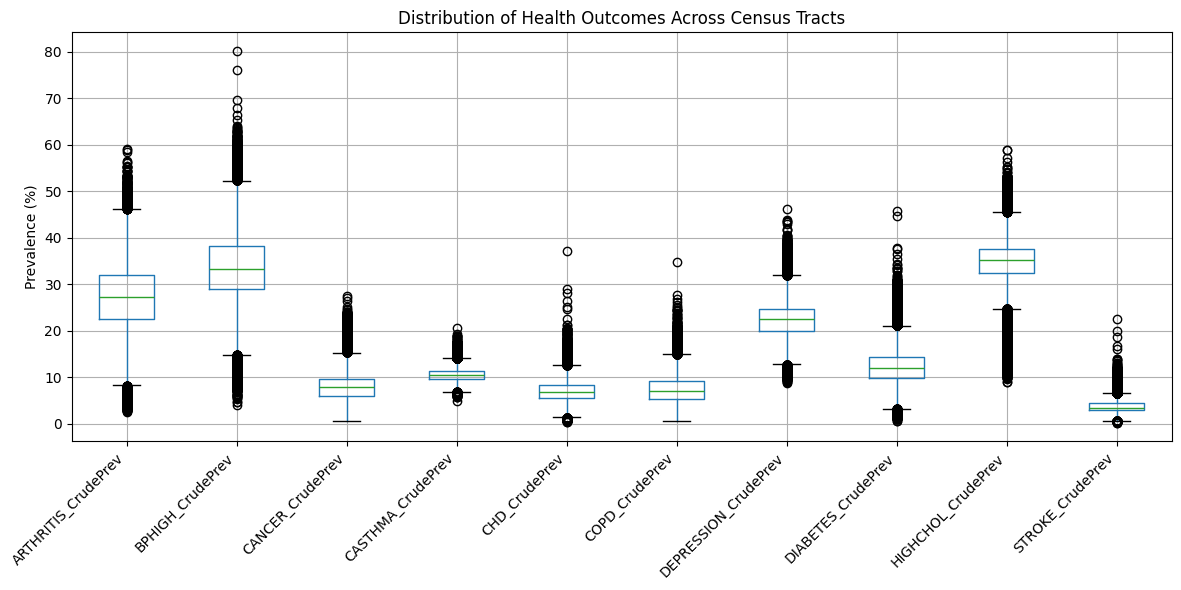

In [36]:
# 3. Health Outcomes Overview
import matplotlib.pyplot as plt
from config import get_measures_by_category, get_prevalence_column

print("\n=== Health Outcomes Overview ===")
health_outcomes = get_measures_by_category('health_outcomes')
outcome_cols = [get_prevalence_column(m) for m in health_outcomes]

# Calculate national averages for health outcomes
national_outcomes = df[outcome_cols].mean().sort_values(ascending=False)

print("\nNational prevalence of health outcomes:")
for measure, value in national_outcomes.items():
    measure_name = measure.replace('_CrudePrev', '')
    print(f"{HEALTH_MEASURES_CONFIG['health_outcomes'][measure_name]}: {value:.1f}%")

# Visualize distribution of major health outcomes
plt.figure(figsize=(12, 6))
df[outcome_cols].boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Health Outcomes Across Census Tracts')
plt.ylabel('Prevalence (%)')
plt.tight_layout()
plt.show()

In [37]:
# 4. Prevention Measures Analysis
print("\n=== Prevention Measures Analysis ===")
prevention_measures = get_measures_by_category('prevention')
prevention_cols = [get_prevalence_column(m) for m in prevention_measures]

# Calculate national averages for prevention measures
national_prevention = df[prevention_cols].mean().sort_values(ascending=False)

print("\nNational prevalence of prevention measures:")
for measure, value in national_prevention.items():
    measure_name = measure.replace('_CrudePrev', '')
    print(f"{HEALTH_MEASURES_CONFIG['prevention'][measure_name]}: {value:.1f}%")


=== Prevention Measures Analysis ===

National prevalence of prevention measures:
Cholesterol screening among adults aged ≥18 years: 84.4%
Taking medicine for high blood pressure control among adults aged ≥18 years with high blood pressure: 76.5%
Visits to doctor for routine checkup within the past year among adults aged ≥18 years: 75.8%
Mammography use among women aged 50-74 years: 75.6%
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years: 64.0%
Visits to dentist or dental clinic among adults aged ≥18 years: 60.6%
Current lack of health insurance among adults aged 18-64 years: 11.5%



=== Social Needs and SDOH Analysis ===


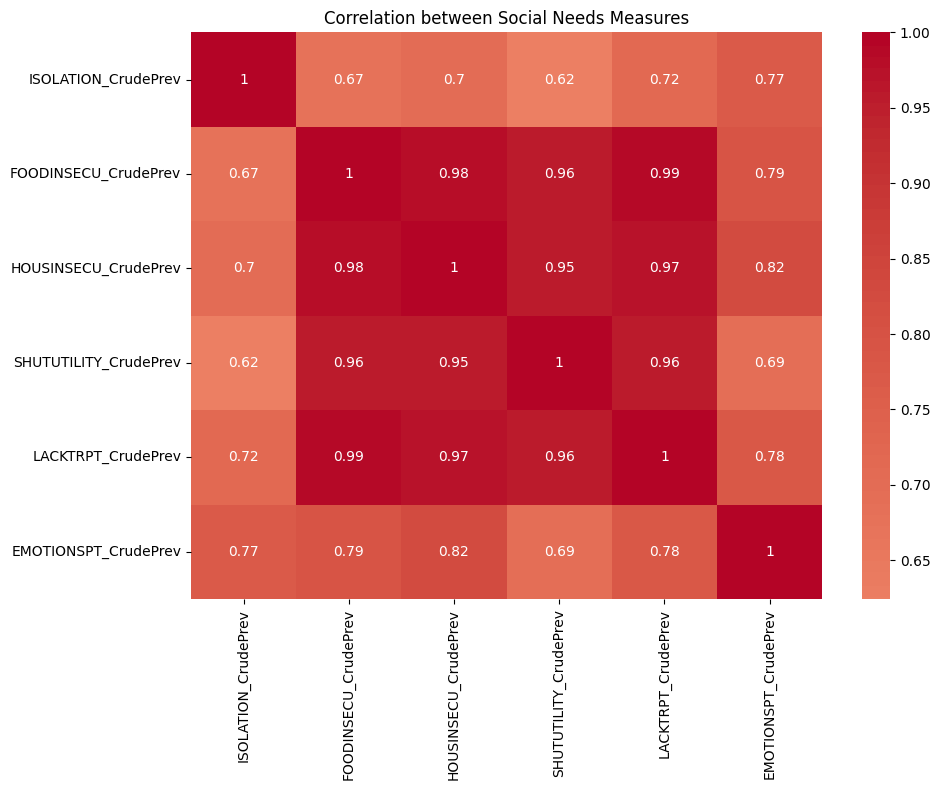

In [38]:
# 5. Social Needs and SDOH Analysis
import seaborn as sns

print("\n=== Social Needs and SDOH Analysis ===")
social_needs = get_measures_by_category('social_needs')
social_cols = [get_prevalence_column(m) for m in social_needs]

# Calculate correlation matrix for social needs
social_corr = df[social_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(social_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Social Needs Measures')
plt.tight_layout()
plt.show()

In [39]:
# 6. Geographic Disparities Analysis
print("\n=== Geographic Disparities Analysis ===")
# Select key health measures for analysis
key_measures = [
    'DIABETES_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'ACCESS2_CrudePrev'
]

# Calculate state-level averages
state_health = df.groupby('StateDesc')[key_measures].mean()

# Find states with highest and lowest prevalence
print("\nStates with highest and lowest prevalence:")
for measure in key_measures:
    measure_name = measure.replace('_CrudePrev', '')
    print(f"\n{measure_name}:")
    print("Highest:")
    print(state_health.nlargest(3, measure)[[measure]])
    print("Lowest:")
    print(state_health.nsmallest(3, measure)[[measure]])


=== Geographic Disparities Analysis ===

States with highest and lowest prevalence:

DIABETES:
Highest:
               DIABETES_CrudePrev
StateDesc                        
West Virginia           16.267949
Mississippi             16.010000
Alabama                 15.582378
Lowest:
                      DIABETES_CrudePrev
StateDesc                               
District of Columbia            8.300000
Colorado                        8.575852
Vermont                         8.601042

OBESITY:
Highest:
               OBESITY_CrudePrev
StateDesc                       
Mississippi            41.738161
West Virginia          41.014469
Louisiana              40.856693
Lowest:
                      OBESITY_CrudePrev
StateDesc                              
District of Columbia          25.290777
Hawaii                        25.445070
Colorado                      26.337509

MHLTH:
Highest:
               MHLTH_CrudePrev
StateDesc                     
West Virginia        21.269963
Louisiana 

In [40]:
# 7. Data Quality Assessment
print("\n=== Data Quality Assessment ===")

# First, let's verify which measures exist in our dataset
def verify_measures():
    available_measures = {}
    all_prev_columns = [col for col in df.columns if col.endswith('_CrudePrev')]
    
    for category, measures in HEALTH_MEASURES_CONFIG.items():
        available_measures[category] = []
        for measure in measures:
            measure_col = get_prevalence_column(measure)
            if measure_col in df.columns:
                available_measures[category].append(measure)
            else:
                print(f"Warning: Measure {measure} ({measure_col}) not found in dataset")
    
    return available_measures

available_measures = verify_measures()

# Now check missing values by category
print("\n=== Missing Values Analysis ===")
for category, measures in available_measures.items():
    if not measures:  # Skip empty categories
        continue
    measure_cols = [get_prevalence_column(m) for m in measures]
    missing = df[measure_cols].isnull().sum()
    missing = missing[missing > 0]  # Only show measures with missing values
    
    if not missing.empty:
        print(f"\n{category} missing values:")
        for col, count in missing.items():
            measure = col.replace('_CrudePrev', '')
            pct_missing = (count / len(df)) * 100
            print(f"{measure}: {count:,} missing values ({pct_missing:.1f}%)")

# Check value ranges
print("\n=== Value Range Analysis ===")
for category, measures in available_measures.items():
    if not measures:
        continue
    print(f"\n{category}:")
    for measure in measures:
        col = get_prevalence_column(measure)
        stats = df[col].describe()
        invalid = df[df[col] > 100][col].count()
        
        print(f"\n{measure}:")
        print(f"Range: {stats['min']:.1f}% to {stats['max']:.1f}%")
        print(f"Mean: {stats['mean']:.1f}%")
        print(f"Median: {stats['50%']:.1f}%")
        if invalid > 0:
            print(f"Warning: {invalid} values > 100%")

# Population coverage for measures with missing values
print("\n=== Population Impact of Missing Values ===")
for category, measures in available_measures.items():
    if not measures:
        continue
    for measure in measures:
        col = get_prevalence_column(measure)
        if df[col].isnull().any():
            pop_missing = df[df[col].isnull()]['TotalPopulation'].sum()
            pct_pop_missing = (pop_missing / df['TotalPopulation'].sum()) * 100
            print(f"\n{measure}:")
            print(f"Population affected by missing values: {pop_missing:,}")
            print(f"Percent of total population: {pct_pop_missing:.1f}%")


=== Data Quality Assessment ===

=== Missing Values Analysis ===

health_outcomes missing values:
BPHIGH: 5,077 missing values (6.1%)
HIGHCHOL: 5,077 missing values (6.1%)

prevention missing values:
CHOLSCREEN: 5,077 missing values (6.1%)
COLON_SCREEN: 3 missing values (0.0%)
MAMMOUSE: 42 missing values (0.1%)
BPMED: 5,077 missing values (6.1%)

health_status missing values:
TEETHLOST: 34 missing values (0.0%)

social_needs missing values:
ISOLATION: 19,635 missing values (23.5%)
FOODINSECU: 19,635 missing values (23.5%)
HOUSINSECU: 19,635 missing values (23.5%)
SHUTUTILITY: 19,635 missing values (23.5%)
LACKTRPT: 19,635 missing values (23.5%)
EMOTIONSPT: 19,635 missing values (23.5%)

sdoh missing values:
FOODSTAMP: 19,635 missing values (23.5%)

=== Value Range Analysis ===

health_outcomes:

ARTHRITIS:
Range: 2.6% to 59.1%
Mean: 27.2%
Median: 27.3%

BPHIGH:
Range: 4.1% to 80.2%
Mean: 33.8%
Median: 33.4%

CANCER:
Range: 0.5% to 27.5%
Mean: 7.9%
Median: 8.0%

CASTHMA:
Range: 5.0% to

## Exploratory Analysis for all the datasets

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Setup paths
PROJECT_ROOT = Path().resolve().parents[0]
sys.path.append(str(PROJECT_ROOT))

from config import (
    PLACES_DATASETS, 
    get_file_path, 
    HEALTH_MEASURES_CONFIG,
    get_measures_by_category,
    get_all_measures,
    get_prevalence_column
)

# 1. Load and validate all years
print("=== Multi-Year Data Loading and Validation ===")
def load_all_years() -> Dict[int, pd.DataFrame]:
    dfs = {}
    for year in sorted(PLACES_DATASETS.keys(), reverse=True):
        file_path = get_file_path(year)
        if file_path.exists():
            print(f"\nLoading {year} data...")
            df = pd.read_csv(file_path)
            print(f"Loaded {len(df):,} records for {year}")
            dfs[year] = df
        else:
            print(f"Warning: Data for {year} not found at {file_path}")
    return dfs

yearly_data = load_all_years()

=== Multi-Year Data Loading and Validation ===

Loading 2024 data...
Loaded 83,522 records for 2024

Loading 2023 data...
Loaded 72,337 records for 2023

Loading 2022 data...
Loaded 72,337 records for 2022

Loading 2021 data...
Loaded 72,337 records for 2021

Loading 2020 data...
Loaded 72,337 records for 2020


In [42]:
# 2. Basic Temporal Coverage Analysis
print("\n=== Temporal Coverage Analysis ===")
coverage_stats = {}
for year, df in yearly_data.items():
    coverage_stats[year] = {
        'census_tracts': len(df),
        'states': df['StateDesc'].nunique(),
        'counties': df['CountyFIPS'].nunique(),
        'total_population': df['TotalPopulation'].sum(),
        'measures': len([col for col in df.columns if col.endswith('_CrudePrev')])
    }

coverage_df = pd.DataFrame(coverage_stats).T
print("\nYearly Coverage Statistics:")
print(coverage_df)


=== Temporal Coverage Analysis ===

Yearly Coverage Statistics:
      census_tracts  states  counties  total_population  measures
2024          83522      51      3143         331444902        39
2023          72337      51      3142         308743168        36
2022          72337      51      3142         308743168        30
2021          72337      51      3142         308743168        30
2020          72337      51      3142         308743168        28


In [43]:
# 3. Measure Consistency Check
print("\n=== Measure Consistency Across Years ===")

def get_measures_by_year(dfs: Dict[int, pd.DataFrame]) -> Dict[int, List[str]]:
    measures_by_year = {}
    for year, df in dfs.items():
        measures = [col.replace('_CrudePrev', '') 
                   for col in df.columns if col.endswith('_CrudePrev')]
        measures_by_year[year] = measures
    return measures_by_year

measures_by_year = get_measures_by_year(yearly_data)

# Find common measures across all years
common_measures = set(measures_by_year[list(yearly_data.keys())[0]])
for measures in measures_by_year.values():
    common_measures = common_measures.intersection(set(measures))

print(f"\nMeasures available in all years: {len(common_measures)}")
print("\nMeasures by category that are consistent across years:")
for category, measures in HEALTH_MEASURES_CONFIG.items():
    consistent_measures = set(measures.keys()).intersection(common_measures)
    if consistent_measures:
        print(f"\n{category}:")
        for measure in consistent_measures:
            print(f"- {measures[measure]}")


=== Measure Consistency Across Years ===

Measures available in all years: 24

Measures by category that are consistent across years:

health_outcomes:
- Cancer (excluding skin cancer) among adults aged ≥18 years
- Diagnosed diabetes among adults aged ≥18 years
- Current asthma among adults aged ≥18 years
- Stroke among adults aged ≥18 years
- Arthritis among adults aged ≥18 years
- High cholesterol among adults aged ≥18 years
- Coronary heart disease among adults aged ≥18 years
- Chronic obstructive pulmonary disease among adults aged ≥18 years
- High blood pressure among adults aged ≥18 years

prevention:
- Visits to dentist or dental clinic among adults aged ≥18 years
- Current lack of health insurance among adults aged 18-64 years
- Mammography use among women aged 50-74 years
- Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years
- Taking medicine for high blood pressure control among adults aged ≥18 years with high blood pressure
- Visits to docto


=== Temporal Trends in Key Health Measures ===


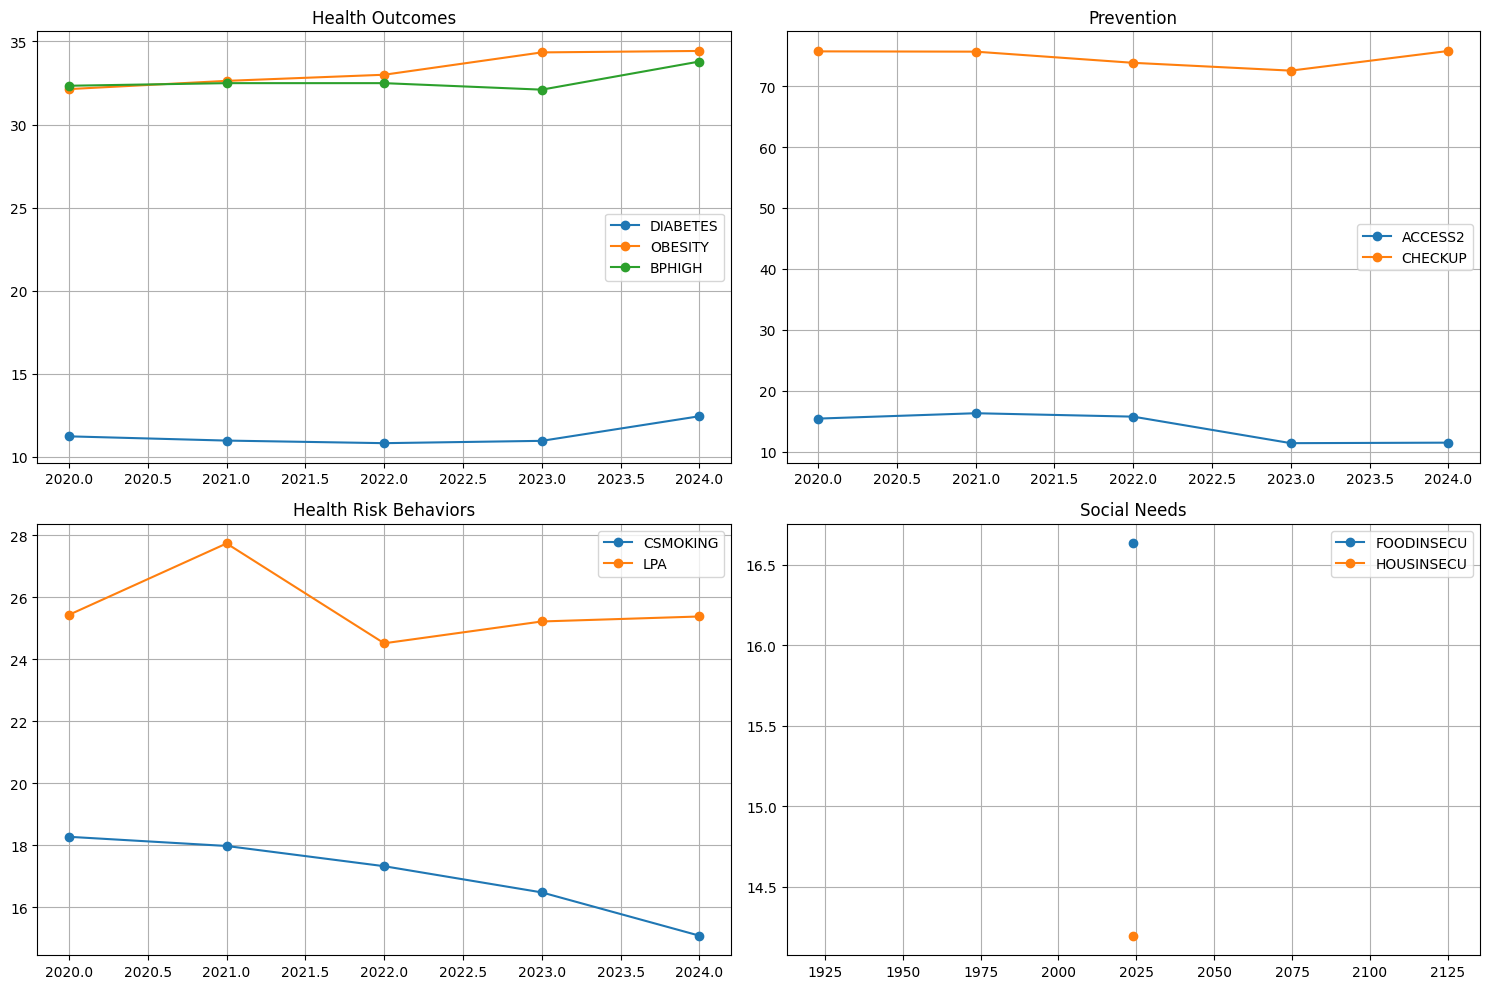

In [44]:
# 4. Temporal Trends in Key Health Measures
print("\n=== Temporal Trends in Key Health Measures ===")

# Select key measures from each category
key_measures = {
    'Health Outcomes': ['DIABETES', 'OBESITY', 'BPHIGH'],
    'Prevention': ['ACCESS2', 'CHECKUP'],
    'Health Risk Behaviors': ['CSMOKING', 'LPA'],
    'Social Needs': ['FOODINSECU', 'HOUSINSECU']
}

# Calculate national averages by year
national_trends = {}
for year, df in yearly_data.items():
    national_trends[year] = {}
    for category, measures in key_measures.items():
        for measure in measures:
            col = get_prevalence_column(measure)
            if col in df.columns:
                national_trends[year][measure] = df[col].mean()

# Create trend visualization
trends_df = pd.DataFrame(national_trends).T

plt.figure(figsize=(15, 10))
for category, measures in key_measures.items():
    plt.subplot(2, 2, list(key_measures.keys()).index(category) + 1)
    for measure in measures:
        if measure in trends_df.columns:
            trends_df[measure].plot(marker='o', label=measure)
    plt.title(category)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


=== Geographic Stability Analysis ===

State Ranking Volatility for DIABETES (Top 10 most volatile):
StateDesc
District of Columbia    6.964194
Arizona                 6.906519
Hawaii                  5.856620
Idaho                   5.263079
North Dakota            5.029911
Iowa                    4.979960
New Jersey              4.966555
New York                4.494441
South Dakota            4.393177
Montana                 4.219005
dtype: float64


<Figure size 1200x600 with 0 Axes>

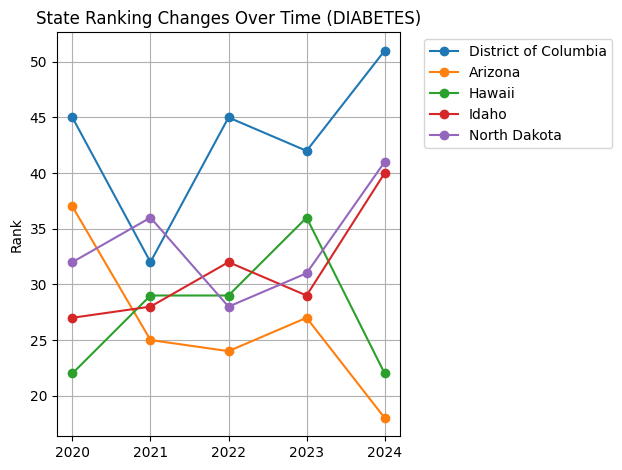

In [45]:
# 5. Geographic Stability Analysis
print("\n=== Geographic Stability Analysis ===")

def calculate_state_rankings(df: pd.DataFrame, measure: str) -> pd.Series:
    return df.groupby('StateDesc')[get_prevalence_column(measure)].mean().rank(ascending=False)

# Analyze ranking stability for key measures
key_measure = 'DIABETES'  # Example measure
ranking_stability = pd.DataFrame({
    year: calculate_state_rankings(df, key_measure)
    for year, df in yearly_data.items()
})

# Calculate ranking volatility
ranking_volatility = ranking_stability.std(axis=1).sort_values(ascending=False)

print(f"\nState Ranking Volatility for {key_measure} (Top 10 most volatile):")
print(ranking_volatility.head(10))

# Visualize ranking changes for top states
plt.figure(figsize=(12, 6))
ranking_stability.loc[ranking_volatility.head(5).index].T.plot(marker='o')
plt.title(f'State Ranking Changes Over Time ({key_measure})')
plt.ylabel('Rank')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=== Data Quality Trends ===

Trend in Missing Values Percentage by Category:
      health_outcomes_missing_pct  prevention_missing_pct  \
2024                     1.215728                1.744451   
2023                     5.757773                3.313262   
2022                     0.552691                0.812665   
2021                     2.763454                1.602223   
2020                     0.000000                0.023106   

      health_risk_behaviors_missing_pct  disabilities_missing_pct  \
2024                           0.000000                  0.000000   
2023                           4.606218                  5.757773   
2022                           0.000000                       NaN   
2021                           2.210764                       NaN   
2020                           0.000000                       NaN   

      health_status_missing_pct  social_needs_missing_pct  sdoh_missing_pct  
2024                   0.010177                 23.508776     

<Figure size 1200x600 with 0 Axes>

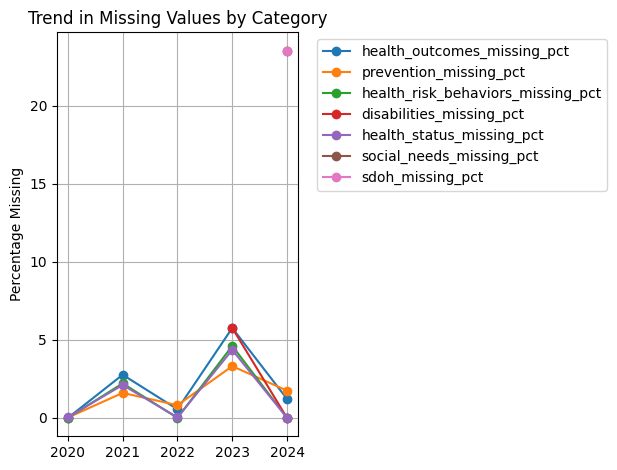

In [46]:
# 6. Data Quality Trends
print("\n=== Data Quality Trends ===")

quality_metrics = {}
for year, df in yearly_data.items():
    metrics = {}
    
    # Missing value analysis
    for category, measures in HEALTH_MEASURES_CONFIG.items():
        measure_cols = [get_prevalence_column(m) for m in measures if get_prevalence_column(m) in df.columns]
        if measure_cols:
            missing = df[measure_cols].isnull().sum()
            metrics[f'{category}_missing_pct'] = (missing.sum() / (len(df) * len(measure_cols))) * 100
    
    # Value range analysis
    for measure in common_measures:
        col = get_prevalence_column(measure)
        metrics[f'{measure}_mean'] = df[col].mean()
        metrics[f'{measure}_std'] = df[col].std()
        metrics[f'{measure}_invalid'] = (df[col] > 100).sum()
    
    quality_metrics[year] = metrics

quality_df = pd.DataFrame(quality_metrics).T

# Display trend in missing values
print("\nTrend in Missing Values Percentage by Category:")
missing_cols = [col for col in quality_df.columns if 'missing' in col]
print(quality_df[missing_cols])

# Visualize quality metrics
plt.figure(figsize=(12, 6))
quality_df[missing_cols].plot(marker='o')
plt.title('Trend in Missing Values by Category')
plt.ylabel('Percentage Missing')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=== Correlation Stability Analysis ===

Number of measures common across all years: 7
Common measures:
- ACCESS2
- BPHIGH
- CHECKUP
- CSMOKING
- DIABETES
- LPA
- OBESITY

Correlation Changes Between Consecutive Years:
2020 to 2021: Average absolute change = 0.022
2021 to 2022: Average absolute change = 0.036
2022 to 2023: Average absolute change = 0.025
2023 to 2024: Average absolute change = 0.038


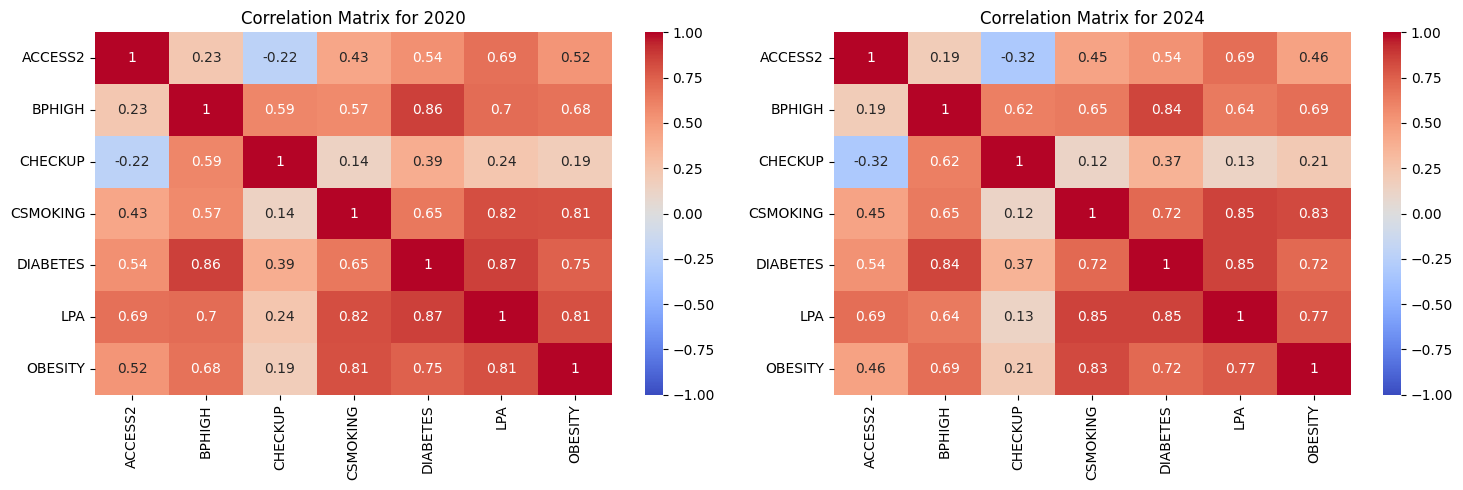


Correlation Stability Metrics:

Most stable correlations:
                         mean       std       min       max     range
CSMOKING vs OBESITY  0.828519  0.008761  0.811930  0.837868  0.025938
BPHIGH vs DIABETES   0.859719  0.011715  0.843759  0.872832  0.029073
DIABETES vs LPA      0.854901  0.010305  0.836711  0.866334  0.029623
ACCESS2 vs DIABETES  0.547274  0.011914  0.538574  0.570514  0.031940
DIABETES vs OBESITY  0.738145  0.012605  0.715865  0.749445  0.033579

Least stable correlations:
                         mean       std       min       max     range
CHECKUP vs LPA       0.223753  0.066267  0.132794  0.305960  0.173166
CHECKUP vs OBESITY   0.243430  0.064312  0.185343  0.358224  0.172881
CHECKUP vs CSMOKING  0.192932  0.077188  0.124710  0.296100  0.171390
ACCESS2 vs CHECKUP  -0.242933  0.061167 -0.318295 -0.164719  0.153576
BPHIGH vs CSMOKING   0.632621  0.032554  0.573582  0.670758  0.097177


In [48]:
# 7. Correlation Stability Analysis
print("\n=== Correlation Stability Analysis ===")

# Flatten the key_measures dictionary into a single list
key_measures_flat = [measure for measures in key_measures.values() for measure in measures]

# First, find measures common across all years
common_measure_cols = set()
for year, df in yearly_data.items():
    if not common_measure_cols:
        common_measure_cols = set([get_prevalence_column(m) for m in key_measures_flat 
                                 if get_prevalence_column(m) in df.columns])
    else:
        year_measures = set([get_prevalence_column(m) for m in key_measures_flat 
                           if get_prevalence_column(m) in df.columns])
        common_measure_cols = common_measure_cols.intersection(year_measures)

common_measure_cols = sorted(list(common_measure_cols))
print(f"\nNumber of measures common across all years: {len(common_measure_cols)}")
print("Common measures:")
for col in common_measure_cols:
    print(f"- {col.replace('_CrudePrev', '')}")

# Calculate correlation matrices for each year using only common measures
correlation_matrices = {}
for year, df in yearly_data.items():
    correlation_matrices[year] = df[common_measure_cols].corr()

# Calculate correlation changes between consecutive years
print("\nCorrelation Changes Between Consecutive Years:")
years = sorted(correlation_matrices.keys())
for i in range(len(years)-1):
    year1, year2 = years[i], years[i+1]
    correlation_change = (correlation_matrices[year2] - correlation_matrices[year1]).abs().mean().mean()
    print(f"{year1} to {year2}: Average absolute change = {correlation_change:.3f}")

# Visualize correlation matrices
plt.figure(figsize=(15, 5))

# Plot first and last year for comparison
first_year = min(years)
last_year = max(years)

# First year correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrices[first_year],
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            xticklabels=[m.replace('_CrudePrev', '') for m in common_measure_cols],
            yticklabels=[m.replace('_CrudePrev', '') for m in common_measure_cols])
plt.title(f'Correlation Matrix for {first_year}')

# Last year correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrices[last_year],
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            xticklabels=[m.replace('_CrudePrev', '') for m in common_measure_cols],
            yticklabels=[m.replace('_CrudePrev', '') for m in common_measure_cols])
plt.title(f'Correlation Matrix for {last_year}')

plt.tight_layout()
plt.show()

# Calculate correlation stability metrics
print("\nCorrelation Stability Metrics:")
stability_metrics = {}
for measure1 in common_measure_cols:
    for measure2 in common_measure_cols:
        if measure1 < measure2:  # Only look at unique pairs
            correlations = [correlation_matrices[year].loc[measure1, measure2] 
                          for year in years]
            stability_metrics[f"{measure1.replace('_CrudePrev', '')} vs {measure2.replace('_CrudePrev', '')}"] = {
                'mean': np.mean(correlations),
                'std': np.std(correlations),
                'min': np.min(correlations),
                'max': np.max(correlations),
                'range': np.max(correlations) - np.min(correlations)
            }

stability_df = pd.DataFrame(stability_metrics).T
most_stable = stability_df.sort_values('range').head()
least_stable = stability_df.sort_values('range', ascending=False).head()

print("\nMost stable correlations:")
print(most_stable)
print("\nLeast stable correlations:")
print(least_stable)